# **Assignment 10**
## By Vyanna Hill

In [1]:
#Using the template provided for this week's assignment 
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [2]:
# Load datasets here once and assign to variables iris and boston
#sklearn data loads in a bunch instead of a dataset like seaborn, we have to extract the data into its own table

#For iris, its datset was updated to return the bunch into its own datasets
iris= ds.load_iris(as_frame=True)

#boston is currently depricated so we have to do the longer method of extraction its data from the bunch
boston = ds.load_boston()
boston_table=pd.DataFrame(boston.data,columns=boston.feature_names)

C:\Users\walki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
#storing the dataset into its own table
iris_table=iris['frame']
iris_table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#printing out the target names only
iris_tnames=iris['target_names']
print(iris_tnames)

['setosa' 'versicolor' 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [5]:
#use the KNN model of n=5 
neighbors=5
model=KNN(n_neighbors=neighbors)

#use the values of iris to predict the target value (y=target), we will remove target from the observations
X=iris_table.iloc[:,0:4].values

#In order to get the target name for Y, we will create a string array of the target values algining them with the target name
y=iris.target_names[iris.target]
model.fit(X,y)

#test predictions with last two observation in the iris table
new_observations=iris_table.iloc[130:149,0:4].values
print(model.predict(new_observations))


['virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [6]:
#Using test train split, spilt the iris table for the train/test datasets, we can use the same knn model used above
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.5)

#Apply the knn model to our training set
model.fit(X_train,y_train)

#print out the accuracy of the knn model usign the test data sets
print(model.score(X_test,y_test))

0.96


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

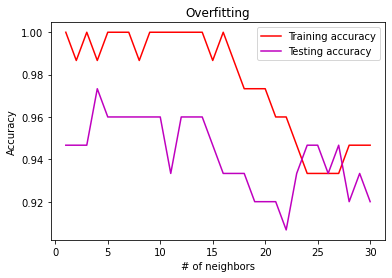

In [7]:
#create dictonaries to store scores
test_accuracies={}
train_accuracies={}
neighbors=np.arange(1,31)

#for the range of neighbors from 1 to 30
for k in neighbors:
    #Create a KNN model with the specific # of neighbhors and fit with the training sets
    model=KNN(n_neighbors=k)
    model.fit(X_train,y_train)
    
    #store the acccuracy results of the KNN model for that specificn
    train_accuracies[k]=model.score(X_train,y_train)
    test_accuracies[k]=model.score(X_test,y_test)
    
#plot the two accuracies of the test/train  results over the # of neighbors
plt.plot(neighbors,train_accuracies.values(),color="r",label="Training accuracy")
plt.plot(neighbors,test_accuracies.values(),color="m",label="Testing accuracy")
plt.xlabel("# of neighbors")
plt.ylabel("Accuracy")
plt.title("Overfitting")
plt.legend()
plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [8]:
#First step was performed in the top of this doc!
boston_table.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#we can assing the boston values' targets into it own data frame using the .target 
targets=pd.Series(boston.target).to_frame()
targets.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
#use .mean to find average age/ average of the target
avg_age=boston_table["AGE"].mean()
medv=targets[0].mean()

#store the target/meddv into its own array
np_target=targets[0].to_numpy()


**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

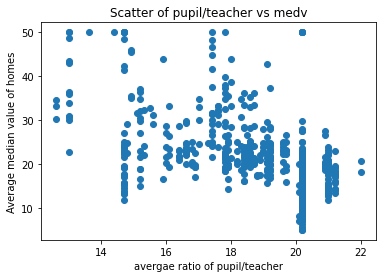

In [11]:
#create a scatter plot between the two values chosen above
plt.scatter(boston_table.PTRATIO,targets[0].values)
plt.xlabel('avergae ratio of pupil/teacher')
plt.ylabel('Average median value of homes')
plt.title('Scatter of pupil/teacher vs medv')
plt.show()

#create a new variable to store the numpy array version of ptratio
ptratio=boston_table['PTRATIO'].to_numpy()

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

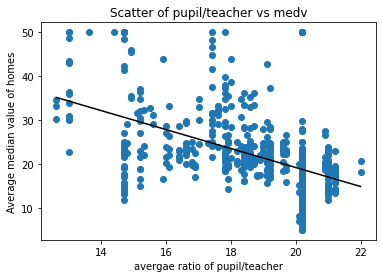

In [12]:
#using. m create the regression model between the two variables
model=lm.LinearRegression()
model.fit(boston_table.PTRATIO.values.reshape(-1, 1),targets[0].values)

#create the new x values for our prediction with a array starting at the min/max of ptraito
new_X=np.linspace(boston_table.PTRATIO.min(),boston_table.PTRATIO.max())

#predict with the new x values created above
pred=model.predict(new_X.reshape(-1, 1))

#now, we can plot our predicted value with the previous scatter plot
plt.scatter(boston_table.PTRATIO,targets[0].values)
plt.plot(new_X,pred,color="0")
plt.xlabel('avergae ratio of pupil/teacher')
plt.ylabel('Average median value of homes')
plt.title('Scatter of pupil/teacher vs medv')
plt.show()